 ## 4 - NN
 
#### 4.1 Perceptron

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def get_dataset():
    x = np.array([[0,0], [1,0], [0,1], [1,1]])
    y = np.array([0, 1, 1, 1])
    return x, y

class Perceptron():
    def __init__(self, epochs, lr):
        self.epochs = epochs
        self.w = []
        self.lr = lr

    def train(self, x, y):
        N, dim = x.shape # 4x2
        # Init model
        self.w = np.random.uniform(-1, 1, (dim,1)) # Gleichverteilung [-1, 1]: 2 Weights
        print(self.w)
        # Training
        error = 0.0
        for epoch in range(self.epochs):
            choice = np.random.choice(N) # Pick random sample from dataset
            x_i = x[choice]
            y_i = y[choice]
            y_hat = self.predict(x_i)
            # Check if we made a false classification
            if y_hat != y_i:
                error += 1
                self.update_weights(x_i, y_i, y_hat)
        print("Train Error: ", error / y.shape[0])
        print(self.w)

    def test(self, x, y):
        y_pred = np.array([self.predict(x_i) for x_i in x])
        acc = sum(1 for y_p, y_i in zip(y_pred, y) if y_p == y_i) / y.shape[0]
        print("Test Acc: ", acc)

    def update_weights(self, x, y, y_hat):
        for i in range(self.w.shape[0]):
            if y_hat > 0:
                delta = -x[i]
            else:
                delta = x[i]
            self.w[i] = self.w[i] + self.lr * delta

    def activation(self, signal):
        if signal > 0:
            return 1
        else:
            return 0

    def predict(self, x):
        input_signal = np.dot(self.w.T, x)
        output_signal = self.activation(input_signal)
        return output_signal

x, y = get_dataset()

lr = 0.5
epochs = 10

p = Perceptron(epochs=epochs, lr=lr)
p.train(x, y)
p.test(x, y)

[[-0.86249981]
 [ 0.45319237]]
Train Error:  0.5
[[0.13750019]
 [0.45319237]]
Test Acc:  1.0


##### Perceptron für die UND-Funktion

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def get_dataset():
    x = np.array([[0,0], [1,0], [0,1], [1,1]])
    y = np.array([0, 0, 0, 1])
    return x, y

class Perceptron():
    def __init__(self, epochs, lr):
        self.epochs = epochs
        self.w = []
        self.lr = lr

    def train(self, x, y):
        N, dim = x.shape # 4x2
        # Init model
        self.w = np.random.uniform(-1, 1, (dim,1)) # Gleichverteilung [-1, 1]: 2 Weights
        print(self.w)
        # Training
        error = 0.0
        for epoch in range(self.epochs):
            choice = np.random.choice(N) # Pick random sample from dataset
            x_i = x[choice]
            y_i = y[choice]
            y_hat = self.predict(x_i)
            # Check if we made a false classification
            if y_hat != y_i:
                error += 1
                self.update_weights(x_i, y_i, y_hat)
        print("Train Error: ", error)
        print(self.w)

    def test(self, x, y):
        y_pred = np.array([self.predict(x_i) for x_i in x])
        acc = sum(1 for y_p, y_i in zip(y_pred, y) if y_p == y_i) / y.shape[0]
        print("Test Acc: ", acc)

    def update_weights(self, x, y, y_hat):
        for i in range(self.w.shape[0]):
            delta_w_i = self.lr * (y - y_hat) * x[i]
            self.w[i] = self.w[i] + delta_w_i

    # Hier soll der Treshold verändert werden.
    def activation(self, signal):
        if signal > 1: # Das ist der Threshold
            return 1
        else:
            return 0

    def predict(self, x):
        input_signal = np.dot(self.w.T, x)
        output_signal = self.activation(input_signal)
        return output_signal

x, y = get_dataset()

lr = 0.1
epochs = 1000

p = Perceptron(epochs=epochs, lr=lr)
p.train(x, y)
p.test(x, y)

[[ 0.12039809]
 [-0.96442339]]
Train Error:  14.0
[[0.92039809]
 [0.13557661]]
Test Acc:  1.0



#### 4.2 Neuronale Netzwerke
Aktivierungsfunktionen

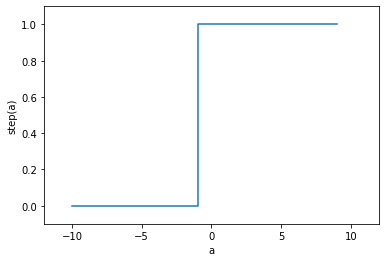

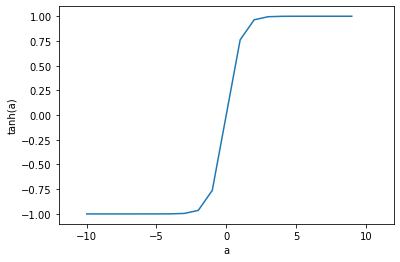

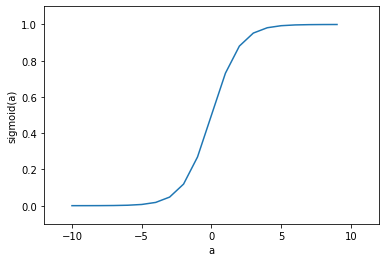

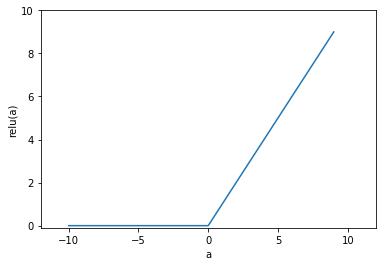

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Step function
# f(a) = 0, if x <= 0 else 1
data = [0 for a in range(-10, 0)]
data.extend([1 for a in range(0, 10)])

plt.step(range(-10, 10), data)
plt.xlabel('a')
plt.ylabel('step(a)')
plt.xlim(-12, 12)
plt.ylim(-0.1, 1.1)

plt.savefig("step.png")
plt.show()

# Tanh
# f(a) = tanh(a) = 2 / (1+e^(-2x)) - 1
data = [2 / (1 + np.exp(-2 * a)) - 1 for a in range(-10, 10, 1)]

plt.plot(range(-10, 10), data)
plt.xlabel('a')
plt.ylabel('tanh(a)')
plt.xlim(-12, 12)
plt.ylim(-1.1, 1.1)

plt.savefig("tanh.png")
plt.show()

# SIGMOID
# sigma(a) = 1 / (1 + e^-a)
data = [1 / (1 + np.exp(-a)) for a in range(-10, 10, 1)]

plt.plot(range(-10, 10), data)
plt.xlabel('a')
plt.ylabel('sigmoid(a)')
plt.xlim(-12, 12)
plt.ylim(-0.1, 1.1)

plt.savefig("sigmoid.png")
plt.show()

# RELU = Rectified Linear Unit
# f(a) = max (0, a)

data = [max(0, a) for a in range(-10, 10, 1)]

plt.plot(range(-10, 10), data)
plt.xlabel('a')
plt.ylabel('relu(a)')
plt.xlim(-12, 12)
plt.ylim(-0.1, 10)

plt.savefig("relu.png")
plt.show()

Bias-Neuron

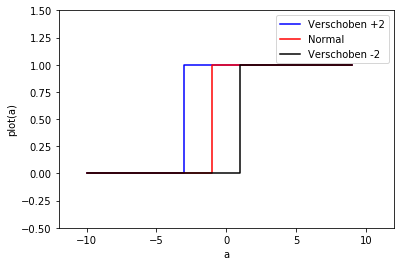

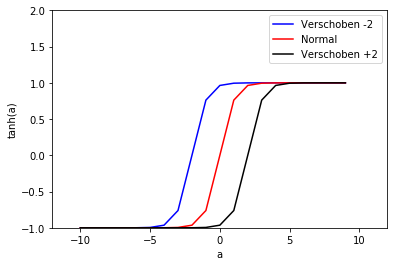

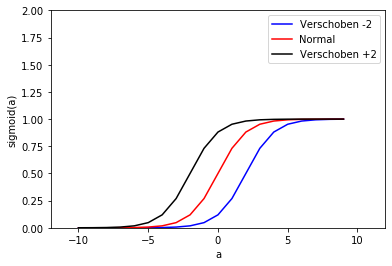

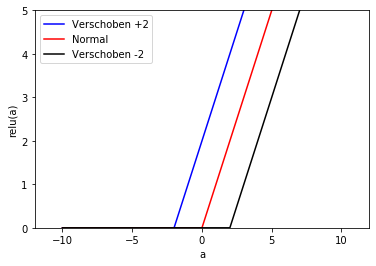

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Bias neuron
b = 1
w_0 = 2.0
shift = b * w_0

w_02 = -2.0
shift2 = b * w_02

# plot function
# f(a) = 0, if x < 0 else 1
data = [0 for a in range(-10, -2)]
data.extend([1 for a in range(-2, 10)])
data_n = [0 for a in range(-10, 0)]
data_n.extend([1 for a in range(0, 10)])
data2 = [0 for a in range(-10, 2)]
data2.extend([1 for a in range(2, 10)])

plt.step(range(-10, 10), data, color='blue')
plt.step(range(-10, 10), data_n, color='red')
plt.step(range(-10, 10), data2, color='black')
plt.xlabel('a')
plt.ylabel('plot(a)')
plt.xlim(-12, 12)
plt.ylim(-0.5, 1.5)
plt.legend(['Verschoben +2', 'Normal', 'Verschoben -2'])

plt.savefig("step2.png")
plt.show()

# Tanh
# f(a) = tanh(a) = 2 / (1+e^(-2x)) - 1
data = [2 / (1 + np.exp(-2 * (a + shift) )) - 1 for a in range(-10, 10, 1)]
data_n = [2 / (1 + np.exp(-2 * a )) - 1 for a in range(-10, 10, 1)]
data2 = [2 / (1 + np.exp(-2 * (a + shift2) )) - 1 for a in range(-10, 10, 1)]

plt.plot(range(-10, 10), data, color='blue')
plt.plot(range(-10, 10), data_n, color='red')
plt.plot(range(-10, 10), data2, color='black')
plt.xlabel('a')
plt.ylabel('tanh(a)')
plt.xlim(-12, 12)
plt.ylim(-1.0, 2.0)
plt.legend(['Verschoben -2', 'Normal', 'Verschoben +2'])

plt.savefig("tanh2.png")
plt.show()

# SIGMOID
# sigma(a) = 1 / (1 + e^-a)
data = [1 / (1 + np.exp(-a + shift)) for a in range(-10, 10, 1)]
data_n = [1 / (1 + np.exp(-a)) for a in range(-10, 10, 1)]
data2 = [1 / (1 + np.exp(-a + shift2)) for a in range(-10, 10, 1)]

plt.plot(range(-10, 10), data, color='blue')
plt.plot(range(-10, 10), data_n, color='red')
plt.plot(range(-10, 10), data2, color='black')
plt.xlabel('a')
plt.ylabel('sigmoid(a)')
plt.xlim(-12, 12)
plt.ylim(0.0, 2.0)
plt.legend(['Verschoben -2', 'Normal', 'Verschoben +2'])

plt.savefig("sigmoid2.png")
plt.show()

# RELU = Rectified Linear Unit
# f(a) = max (0, a)

data = [max(0, a + shift) for a in range(-10, 10, 1)]
data_n = [max(0, a) for a in range(-10, 10, 1)]
data2 = [max(0, a + shift2) for a in range(-10, 10, 1)]

plt.plot(range(-10, 10), data, color='blue')
plt.plot(range(-10, 10), data_n, color='red')
plt.plot(range(-10, 10), data2, color='black')
plt.xlabel('a')
plt.ylabel('relu(a)')
plt.xlim(-12, 12)
plt.ylim(0.0, 5.0)
plt.legend(['Verschoben +2', 'Normal', 'Verschoben -2'])

plt.savefig("relu2.png")
plt.show()

#### Wie lernt das neuronale Netzwerk
Gradient Descent bei der Rosenbrock-Funktion

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

# Rosenbrock Funktion
def f(x0, x1):
    return 100 * (x0**2 - x1)**2 + (x0 - 1)**2

def f_prime_x0(x0, x1):
    return 2 * (200 * x0 * (x0**2 - x1) + x0 - 1)

def f_prime_x1(x0, x1):
    return -200 * (x0**2 - x1)

def plot_rosenbrock(downhill=False, x0=-1, x1=-1):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')

    s = 0.3
    X = np.arange(-2, 2.+s, s)
    Y = np.arange(-2, 3.+s, s)
        
    #Create the mesh grid(s) for all X/Y combos.
    X, Y = np.meshgrid(X, Y)
    #Rosenbrock function w/ two parameters using numpy Arrays
    Z = f(X, Y)

    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, alpha=0.8)
    # Global minimum
    ax.scatter(1, 1, f(1, 1), color="red", marker="*", s=200)
    # Starting point
    ax.scatter(x0, x1, f(x0, x1), color="green", marker="o", s=200)

    if downhill:
        eps = 50
        # Plot Updated Points
        for (x0, x1) in downhill:
            ax.scatter(x0, x1, f(x0, x1)+eps, color="green", marker="o", s=50)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()



Globale Minimum bei:  1 1
Starte bei x =  -1.8574439133576517 0.8393168860915785
Mit f(x) =  689.7827314177098


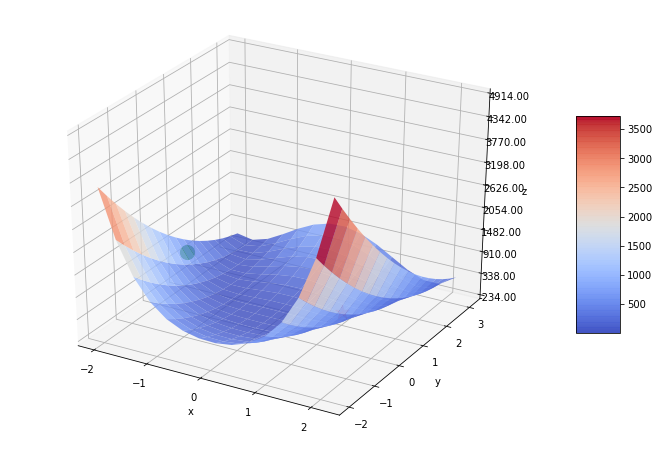

Solution:  8.974665249782138e-08
x0 =  1.0002995774565915
x1 =  1.0005992446598355


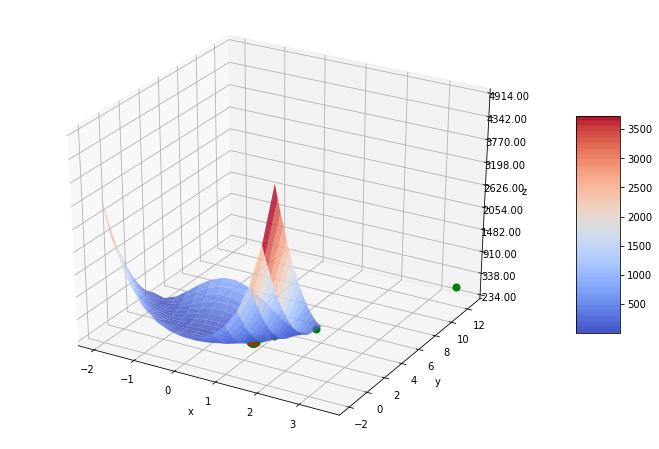

In [8]:
x0 = np.random.uniform(-2, 2)
x1 = np.random.uniform(-2, 2)
y = f(x0, x1)

print("\n\nGlobale Minimum bei: ", 1, 1)
print("Starte bei x = ", x0, x1)
print("Mit f(x) = ", y)
plot_rosenbrock(x0=x0, x1=x1)

eta = 0.005
it = 0
stop_iter = 1000

downhill_points = []

while it < stop_iter:
    x0 = x0 - eta * f_prime_x0(x0, x1)
    x1 = x1 - eta * f_prime_x1(x0, x1)
    it += 1
    fx = f(x0, x1)
    if it % 100 == 0:
        downhill_points.append([x0, x1])

print("Solution: ", fx)
print("x0 = ", x0)
print("x1 = ", x1)
plot_rosenbrock(downhill=downhill_points, x0=x0, x1=x1)

Gradient Descent mit Tensorflow

[0.21785235 0.8636927 ] 466.84036
[0.6119137 0.3725332] 0.15121555
[0.64090097 0.40900952] 0.12945193
[0.66639465 0.44247785] 0.11171039
[0.68904734 0.47330612] 0.09704422
[0.70934665 0.5018022 ] 0.08477949
[0.7276661  0.52822524] 0.074422985
[0.7442981 0.5527947] 0.0656053
[0.7594756 0.5756973] 0.058044337
[0.7733875  0.59709394] 0.05152082
[0.78618884 0.6171238 ] 0.045861844
[0.79800886 0.6359085 ] 0.040929217
[0.8089558  0.65355426] 0.036611423
[0.8191213 0.6701547] 0.032817468
[0.82858396 0.6857925 ] 0.02947245
[0.8374115  0.70054185] 0.026514122
[0.8456631  0.71446943] 0.023890369
[0.85339    0.72763455] 0.021557434
[0.86063725 0.7400907 ] 0.019478291
[0.8674449 0.7518867] 0.017621342
[0.8738484 0.7630668] 0.01595956
[0.87987924 0.77367115] 0.01446975
[0.8855659  0.78373665] 0.013131881
[0.89093345 0.7932967 ] 0.011928606
[0.8960051 0.8023823] 0.01084483
[0.9008014  0.81102204] 0.009867373
[0.90534145 0.8192423 ] 0.008984692
[0.9096421 0.8270671] 0.008186698
[0.913719   0.83451885

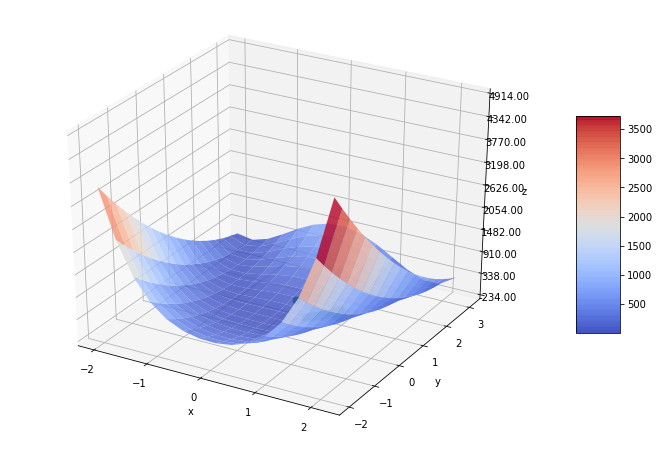

In [10]:
import tensorflow as tf

class Model:
    def __init__(self):
        self.x = tf.Variable(tf.random.uniform(shape=[2], minval=-2.0, maxval=2.0)) # x = [x0, x1]
        self.learning_rate = 0.001 # eta
        self.optimizer = tf.optimizers.SGD(learning_rate=self.learning_rate) # SGD = (stochastic) gradient descent
        self.current_loss_val = self.loss()
    
    def loss(self):
        self.current_loss_val = 100 * (self.x[0]**2 - self.x[1])**2 + (self.x[0] - 1)**2
        return self.current_loss_val
    
    def fit(self):
        self.optimizer.minimize(self.loss, self.x) # loss function, variables 
    
model = Model()
downhill_points = []

for it in range(5000):
    model.fit()
    if it % 100 == 0:
        print(model.x.numpy(), model.current_loss_val.numpy())
        downhill_points.append(model.x.numpy())

plot_rosenbrock(downhill=downhill_points, x0=downhill_points[-1][0], x1=downhill_points[-1][1])

#### 4.3 Daten, Probleme, Ziele

One-Hot Array, Softmax-Klassifizierung, Cross-Entropy Error

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def generate_data_or():
    x = [[0, 0], [1, 1], [1, 0], [0, 1]]
    y = [0, 1, 1, 1]
    return x, y

def to_one_hot(y, num_classes):
    y_one_hot = np.zeros(shape=(len(y), num_classes)) # 4x2
    for i, y_i in enumerate(y):
        y_oh = np.zeros(shape=num_classes)
        y_oh[y_i] = 1
        y_one_hot[i] = y_oh
    return y_one_hot

x, y = generate_data_or()
y = to_one_hot(y, num_classes=2)
print(y)

p1 = [0.223, 0.613]
p2 = [-0.75, 0.5]
p3 = [0.01, 0.2]
p4 = [0.564, 0.234]
y_pred = np.array([p1, p2, p3, p4])

def softmax(y_pred):
    y_softmax = np.zeros(shape=y_pred.shape)
    for i in range(len(y_pred)):
        exps = np.exp(y_pred[i])
        y_softmax[i] = exps / np.sum(exps)
    return y_softmax

print(y_pred)
y_pred = softmax(y_pred)
print(y_pred)

def cross_entropy(y_true, y_pred):
    num_samples = y_pred.shape[0]
    num_classes = y_pred.shape[1]
    loss = 0.0
    for y_t, y_p in zip(y_true, y_pred):
        for c in range(num_classes):
            loss -= y_t[c] * np.log(y_p[c])
    return loss / num_samples

loss = cross_entropy(y, y_pred)
print(loss)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[ 0.223  0.613]
 [-0.75   0.5  ]
 [ 0.01   0.2  ]
 [ 0.564  0.234]]
[[0.4037173  0.5962827 ]
 [0.22270014 0.77729986]
 [0.45264238 0.54735762]
 [0.58175938 0.41824062]]
0.6583301864833186


In [17]:
def generate_data_or():
    x = [[0, 0], [1, 1], [1, 0], [0, 1]]
    y = [0, 1, 1, 1]
    return x, y

def to_one_hot(y, num_classes):
    y_one_hot = np.zeros(shape=(len(y), num_classes)) # 4x2
    for i, y_i in enumerate(y):
        y_oh = np.zeros(shape=num_classes)
        y_oh[y_i] = 1
        y_one_hot[i] = y_oh
    return y_one_hot

x, y = generate_data_or()
y = to_one_hot(y, num_classes=2)
print(y)


[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
